# <center> Zestaw 5
## <center> Ryszard Pręcikowski
### <center> 401433

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
from lab5_utils import *
plt.rcParams["figure.figsize"] = (12,8)

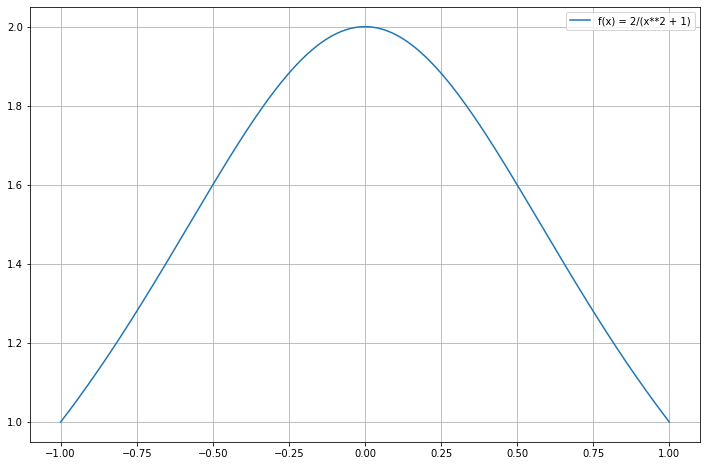

In [2]:
f = 2 / (1 + x**2)
a = -1
b = 1

lf = lambdify(x, f)
x_v = np.linspace(a, b, 1000)

plt.plot(x_v, lf(x_v), label = "f(x) = "+str(f))
plt.legend()
plt.grid(True)
plt.show()
plt.rcParams.update({'font.size': 15})

In [3]:
def my_integrate(f, m, mode, a = -1, b = 1):
    def fk(k):
        return lf(a + k * h)

    h = (b-a)/(m)
    lf = lambdify(x, f)

    if mode == Mode.MIDPOINT:
        res = 0
        for k in range(m):
            res += fk(k + 0.5)
        res *= h

    elif mode == Mode.TRAPEZOIDAL:
        res = fk(0) + fk(m)
        for k in range(1, m):
            res += 2 * fk(k)
        res *= h /2

    elif mode == Mode.SIMPSON_PARABOLIC:
        res = fk(0) + fk(m)
        for k in range(1, m):
            if k % 2 == 0:
                res += 2* fk(k)
            else:
                res += 4* fk(k)
        res *= h / 3

    elif mode == Mode.SIMPSON_CUBIC:
        res = fk(0) + fk(m)

        for k in range(1, m):
            if k % 3 == 0:
                res += 2* fk(k)
            else:
                res += 3* fk(k)
        res *= 3*h / 8

    else:
        res = Gauss_Legendre(f, m, a, b)

    return res

def Gauss_Legendre(f, m, a = -1, b = 1):
    p = legendre_poly(m, x, polys=True)
    r = p.real_roots()
    p_diff = diff(p, x)

    lf = lambdify(x, f)
    res = 0

    interval_sum = (a + b) /2
    interval_sub = (b - a) /2

    for legendre_root in r:
        if legendre_root == 0 or type(legendre_root) == Mul:
            x_v = legendre_root
        else:
            x_v = legendre_root.eval_rational()
        w = 2 / ((1 - x_v**2) * (p_diff(x_v)** 2))
        res += w * lf(interval_sub * x_v + interval_sum)

    res *= interval_sub

    return float(res)

In [4]:
s = 5
t = 30

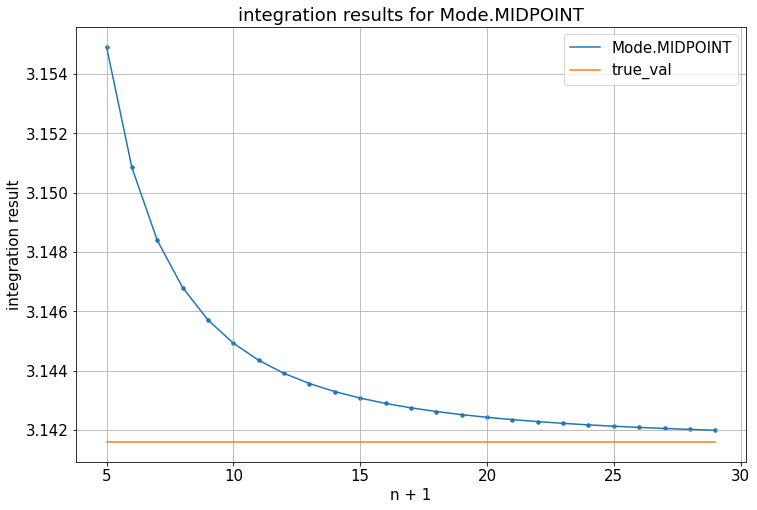

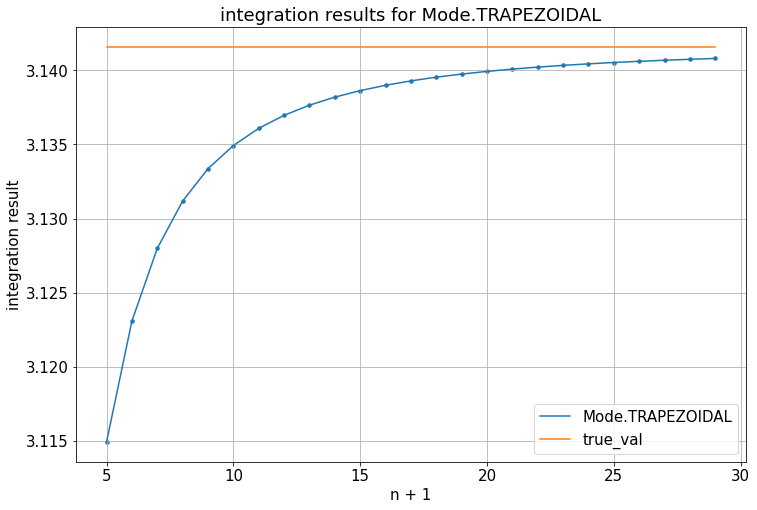

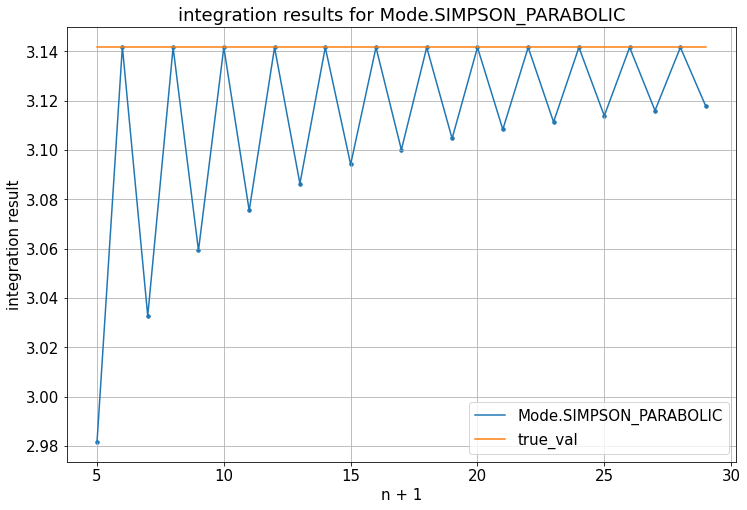

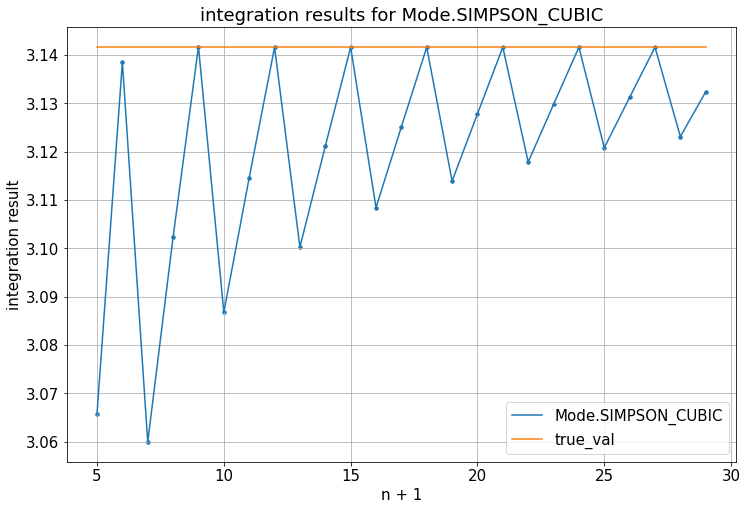

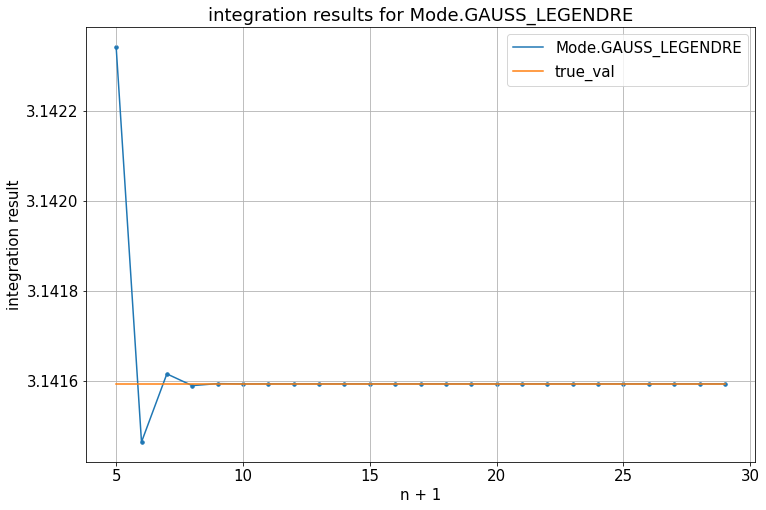

In [5]:
plot_integrations(f, s, t, True, a, b)

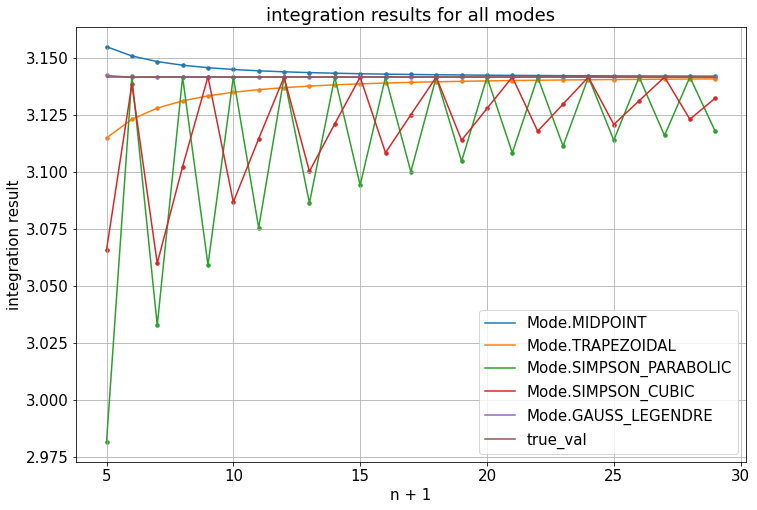

In [6]:
plot_integrations(f, s, t, a=a, b=b)

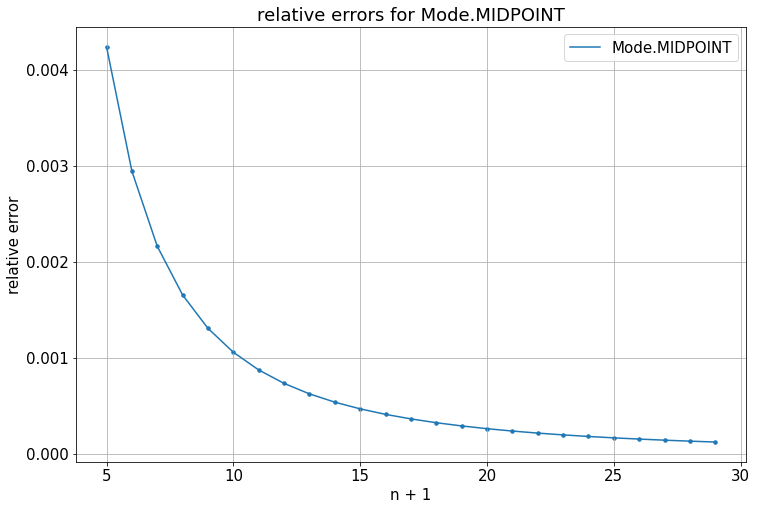

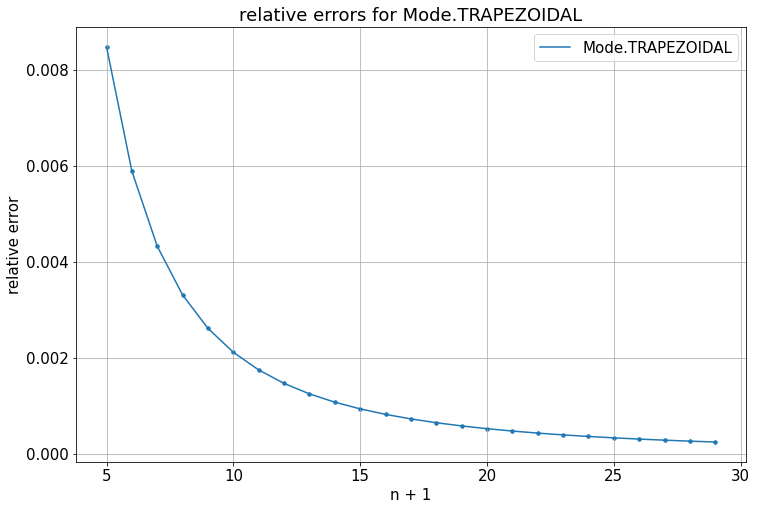

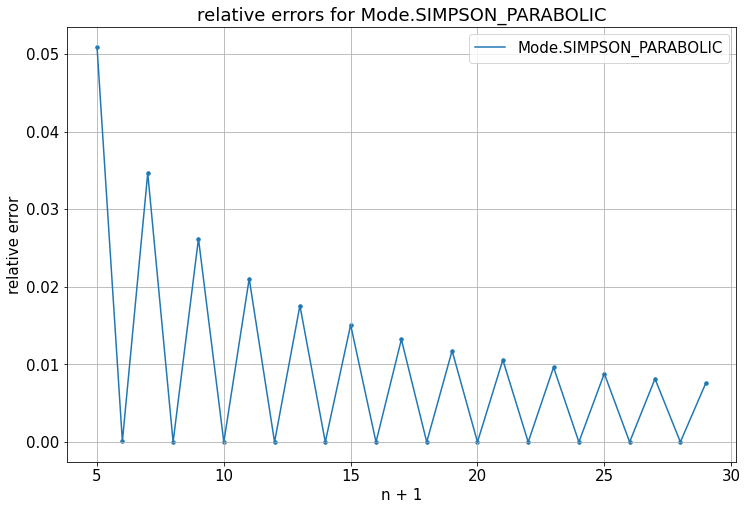

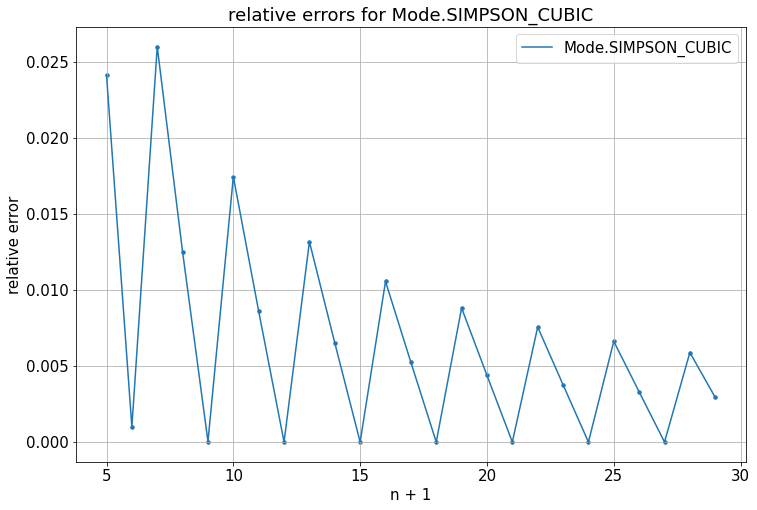

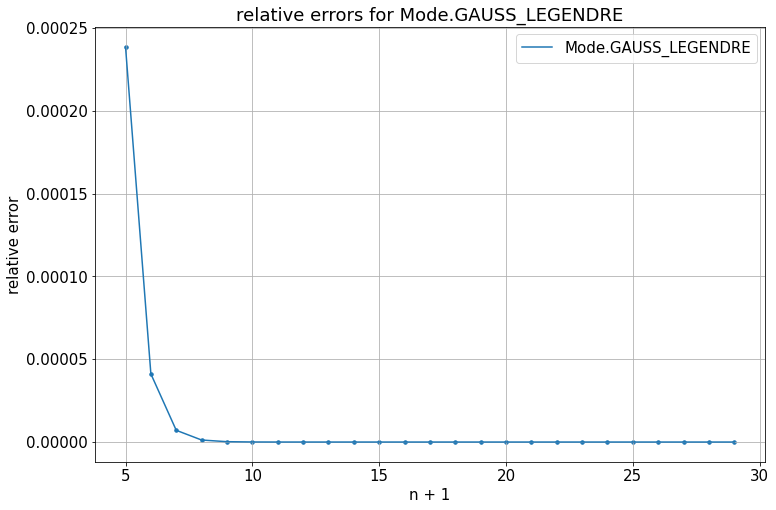

In [7]:
plot_errors(f, s, t, True, a, b)

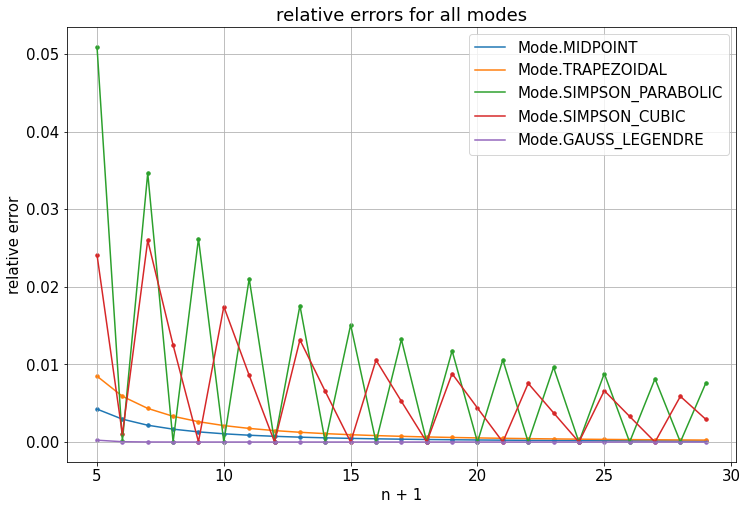

In [8]:
plot_errors(f, s, t, a=a, b=b)